In [1]:
import pandas as pd
import numpy as np

# Titanic-survival prediction 
-P.Viswanadh

In [2]:
data=pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Lets drop all the na values

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

dropping all the columnns which are not helpful in classification

In [7]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [8]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [9]:
import seaborn as sns

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Comparing survival rates of Male and Female

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

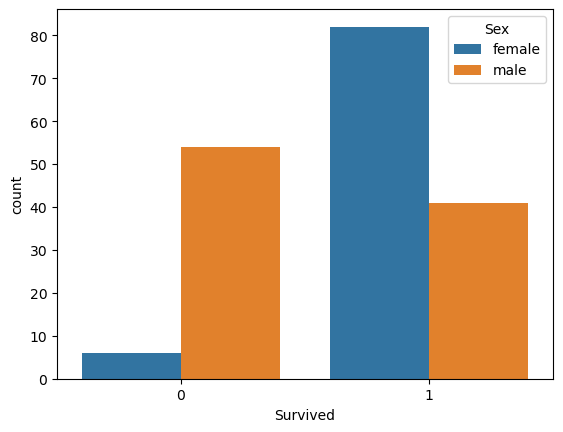

In [10]:
sns.countplot(data['Survived'],hue=data['Sex'])

No.of females survived > No.of males survived

As Cabin data does not help in classification it is being dropped from the model

In [11]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


Age vs Survived 

<AxesSubplot:xlabel='Survived'>

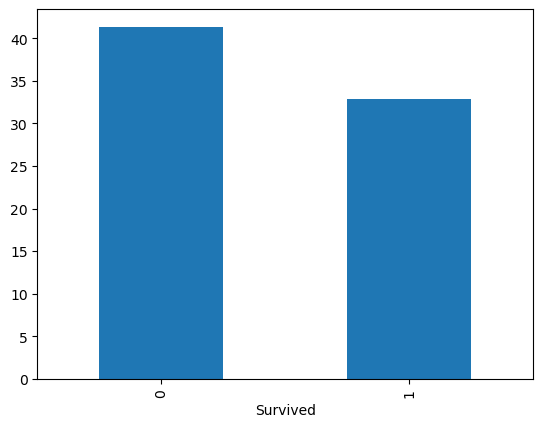

In [12]:
data.groupby(['Survived'])['Age'].mean().plot(kind="bar")

People of small ages have survived

In [13]:
data.groupby(['Survived'])['Fare'].mean()

Survived
0    64.048262
1    85.821107
Name: Fare, dtype: float64

The average fare of people who survived is greater than people who did not

In [14]:
data['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

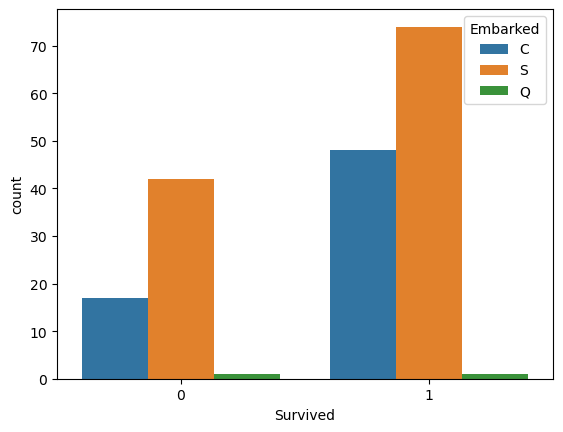

In [15]:
sns.countplot(data['Survived'],hue=data['Embarked'])

In [16]:
data['Fare']=data['Fare'].astype(int)

In [17]:
data.replace({"Sex":{"male":1,"female":0}},inplace=True)

In [18]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,71,C85,C
3,1,1,0,35.0,1,0,53,C123,S
6,0,1,1,54.0,0,0,51,E46,S
10,1,3,0,4.0,1,1,16,G6,S
11,1,1,0,58.0,0,0,26,C103,S


In [19]:
data.drop(["Cabin"],axis=1,inplace=True)

In [20]:
data['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

creating dummies for Embarked column

In [21]:
data=data.join(pd.get_dummies(data['Embarked']))

In [22]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
1,1,1,0,38.0,1,0,71,C,1,0,0
3,1,1,0,35.0,1,0,53,S,0,0,1
6,0,1,1,54.0,0,0,51,S,0,0,1
10,1,3,0,4.0,1,1,16,S,0,0,1
11,1,1,0,58.0,0,0,26,S,0,0,1


In [23]:
data.drop(['Embarked'],axis=1,inplace=True)

In [24]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
1,1,1,0,38.0,1,0,71,1,0,0
3,1,1,0,35.0,1,0,53,0,0,1
6,0,1,1,54.0,0,0,51,0,0,1
10,1,3,0,4.0,1,1,16,0,0,1
11,1,1,0,58.0,0,0,26,0,0,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    int64  
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    int32  
 7   C         183 non-null    uint8  
 8   Q         183 non-null    uint8  
 9   S         183 non-null    uint8  
dtypes: float64(1), int32(1), int64(5), uint8(3)
memory usage: 15.3 KB


In [26]:
data['Age']=data['Age'].astype('int32')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  183 non-null    int64
 1   Pclass    183 non-null    int64
 2   Sex       183 non-null    int64
 3   Age       183 non-null    int32
 4   SibSp     183 non-null    int64
 5   Parch     183 non-null    int64
 6   Fare      183 non-null    int32
 7   C         183 non-null    uint8
 8   Q         183 non-null    uint8
 9   S         183 non-null    uint8
dtypes: int32(2), int64(5), uint8(3)
memory usage: 14.6 KB


In [28]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
1,1,1,0,38,1,0,71,1,0,0
3,1,1,0,35,1,0,53,0,0,1
6,0,1,1,54,0,0,51,0,0,1
10,1,3,0,4,1,1,16,0,0,1
11,1,1,0,58,0,0,26,0,0,1


In [29]:
data_y=data['Survived']

In [30]:
data.drop(['Survived'],axis=1,inplace=True)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
1,1,0,38,1,0,71,1,0,0
3,1,0,35,1,0,53,0,0,1
6,1,1,54,0,0,51,0,0,1
10,3,0,4,1,1,16,0,0,1
11,1,0,58,0,0,26,0,0,1


# USING LOGISTIC REGRESSION MODEL

In [33]:
x_train,x_test,y_train,y_test=train_test_split(data,data_y,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(x_train,y_train)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_predictions=lr.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [44]:
print(accuracy_score(y_predictions,y_test))

0.7567567567567568


In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
cm=confusion_matrix(y_predictions,y_test)

<AxesSubplot:>

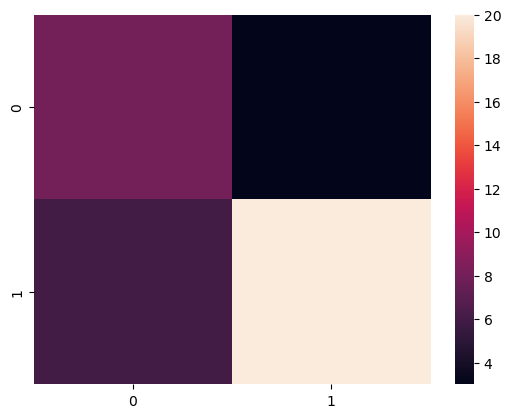

In [51]:
sns.heatmap(cm)

# Automated function 

In [59]:
def predict_survival(x,y,ml_model):
    x_train,x_test,y_train,y_test=train_test_split(x,y)
    ml_model.fit(x_train,y_train)
    y_prediction=ml_model.predict(x_test)
    print(accuracy_score(y_test,y_prediction))
    cm=confusion_matrix(y_test,y_prediction)
    sns.heatmap(cm)

0.7608695652173914


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


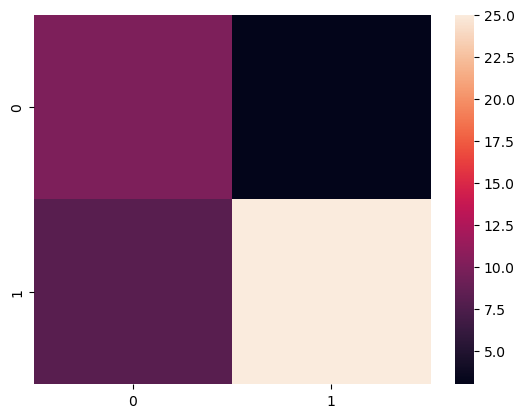

In [60]:
predict_survival(data,data_y,lr)